<html>
<h2>Olympics Through the Centuries: Data Trends from 1896–2016</h2>
</html>

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#Loading data
data = pd.read_csv("athlete_events_raw_data.csv")
data.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


<html>
<h3>Data Understanding</h3>
<html>

In [5]:
data.shape

(271116, 15)

In [6]:
data.describe()

,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


<html>
<h3>Data Cleaning & Preparation</h3>
</html>

In [8]:
#Converting data types
data['Name'] = data['Name'].astype('string')
data['Sex'] = data['Sex'].astype('string')
data['NOC'] = data['NOC'].astype('string')
data['Season'] = data['Season'].astype('string')
data['City'] = data['City'].astype('string')
data['Sport'] = data['Sport'].astype('string')

In [9]:
data.dtypes

ID                 int64
Name      string[python]
Sex       string[python]
Age              float64
Height           float64
Weight           float64
Team              object
NOC       string[python]
Games             object
Year               int64
Season    string[python]
City      string[python]
Sport     string[python]
Event             object
Medal             object
dtype: object

In [10]:
#Checking for null values
data.isnull().sum()

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64

In [11]:
data.nunique()

ID        135571
Name      134732
Sex            2
Age           74
Height        95
Weight       220
Team        1184
NOC          230
Games         51
Year          35
Season         2
City          42
Sport         66
Event        765
Medal          3
dtype: int64

In [12]:
#Checking for duplicates
data.duplicated().sum()

np.int64(1385)

In [13]:
#Remove duplicates
data.drop_duplicates(inplace=True)

In [14]:
data.shape

(269731, 15)

In [15]:
#Checking percentage of missing values per column
data.isnull().mean() * 100

ID         0.000000
Name       0.000000
Sex        0.000000
Age        3.453441
Height    21.804687
Weight    22.810504
Team       0.000000
NOC        0.000000
Games      0.000000
Year       0.000000
Season     0.000000
City       0.000000
Sport      0.000000
Event      0.000000
Medal     85.254939
dtype: float64

In [16]:
#Replacing null values in Medal with 'No medal'
data['Medal'] = data['Medal'].fillna('No medal')
print(data['Medal'].unique())
print(data['Medal'].isnull().sum())

['No medal' 'Gold' 'Bronze' 'Silver']
0


In [17]:
#Summary statistics for Age 

col_age = data['Age']

print("Skewness:", col_age.skew())
print("Mean:", col_age.mean())
print("Median:", col_age.median())


Skewness: 1.5617967856793484
Mean: 25.454776204227084
Median: 24.0


In [18]:
#Age imputation
data['Age'] = data['Age'].fillna(data["Age"].median())

In [19]:
#Summary statistics for height grouped by sport
col_height = data['Height'].groupby(data['Sport']) 

print("Maximum skewness:", col_height.skew().max()) 
print("Minimum skewness:", col_height.skew().min())

Maximum skewness: 0.423785568199931
Minimum skewness: -1.9319219694363092


In [20]:
global_median = data['Height'].median()
data['Height'] = col_height.transform(lambda x: x.fillna(x.median() if not x.isna().all() else global_median))

In [21]:
#Summary statistics for height grouped by sport
col_weight = data['Weight'].groupby(data['Sport']) 

print("Maximum skewness:", col_weight.skew().max()) 
print("Minimum skewness:", col_weight.skew().min())

Maximum skewness: 1.467537012726256
Minimum skewness: -0.6048930788871862


In [22]:
#imput the weight
overall_median = data['Weight'].median()
data['Weight'] = col_weight.transform(lambda x: x.fillna(x.median() if not x.isna().all() else overall_median))

In [23]:
data['Height'].astype(int)
data['Weight'].astype(int)

0         80
1         60
2         71
3         95
4         82
          ..
271111    89
271112    59
271113    59
271114    96
271115    96
Name: Weight, Length: 269731, dtype: int64

In [24]:
#drop game column
data.drop(columns=['Games'], inplace=True)

In [25]:
data.isnull().sum()

ID        0
Name      0
Sex       0
Age       0
Height    0
Weight    0
Team      0
NOC       0
Year      0
Season    0
City      0
Sport     0
Event     0
Medal     0
dtype: int64

EDa

In [26]:
#Total athletes 
Total_athletes = len(data)
print(Total_athletes)

269731


In [27]:
data['Sex'].value_counts()

Sex
M    195353
F     74378
Name: count, dtype: Int64

In [28]:
print("Total countries: ", data['NOC'].nunique())
print("Total number of sports recorded: ", data['Sport'].nunique())
#Years played
print("Games were played since", data['Year'].min(), "to", data['Year'].max())

Total countries:  230
Total number of sports recorded:  66
Games were played since 1896 to 2016


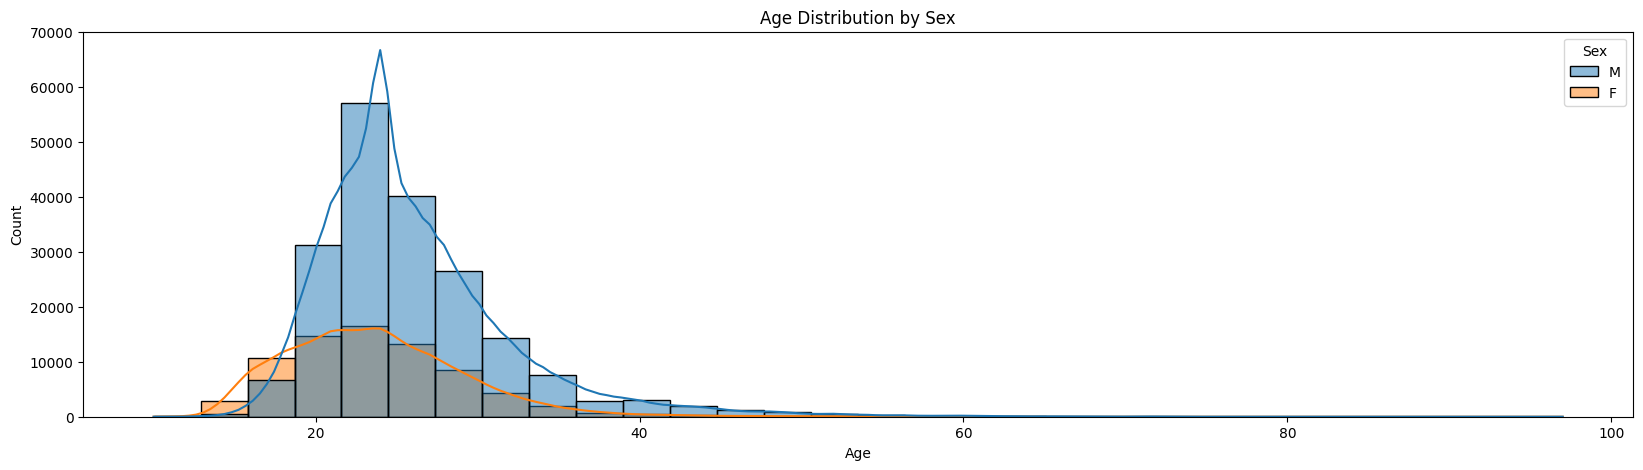

In [29]:
plt.figure(figsize=(20,5))
sns.histplot(data=data, x='Age', hue='Sex', bins=30, kde=True, alpha=0.5)
plt.title('Age Distribution by Sex')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

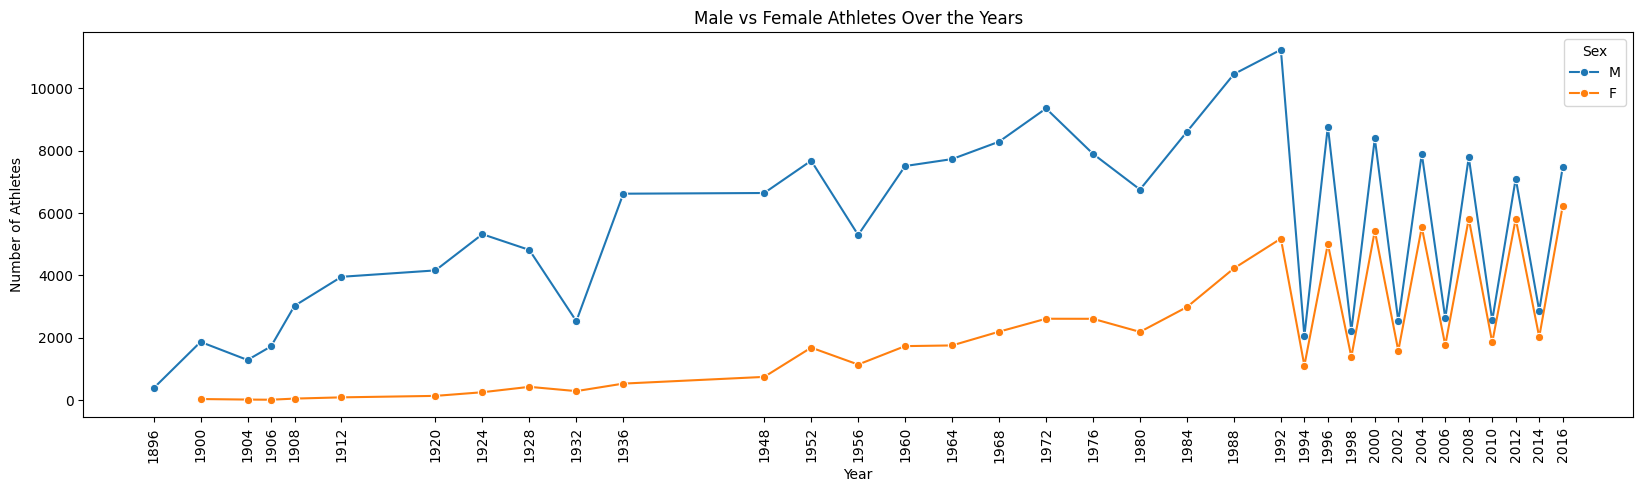

In [30]:
gender_year = data.groupby(["Year", "Sex"]).size().reset_index(name="Count")

plt.figure(figsize=(20,5))

sns.lineplot(
    data=gender_year,
    x="Year",
    y="Count",
    hue="Sex",
    marker="o"
)

plt.title("Male vs Female Athletes Over the Years")
plt.xlabel("Year")
plt.ylabel("Number of Athletes")
plt.xticks(gender_year["Year"].unique(), rotation=90)
plt.show()

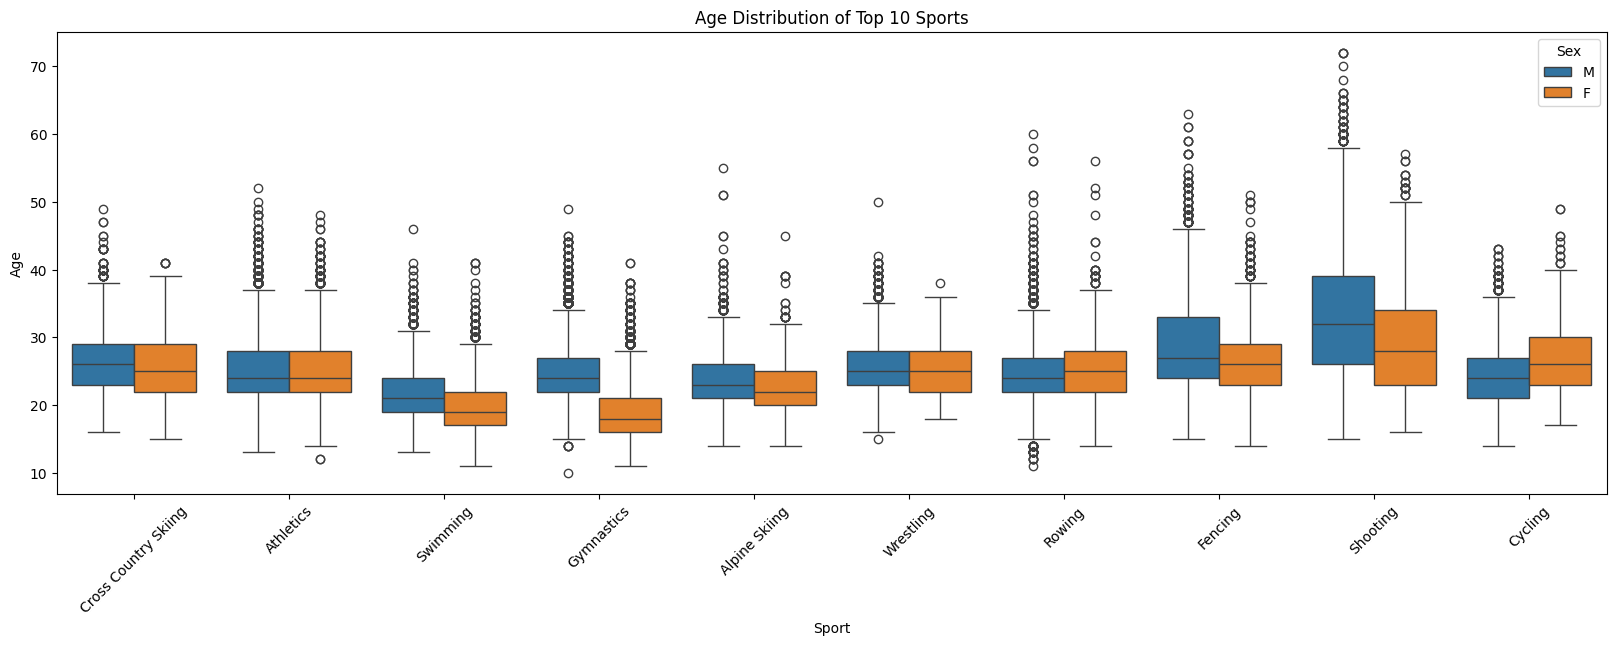

In [31]:
#Age distribution in the top 10 sports
top10_sports = data['Sport'].value_counts().head(10).index
filtered_data = data[data['Sport'].isin(top10_sports)]

plt.figure(figsize=(20,6))
sns.boxplot(data=filtered_data, x='Sport', y='Age', hue='Sex')
plt.title('Age Distribution of Top 10 Sports')
plt.xticks(rotation=45)
plt.show()

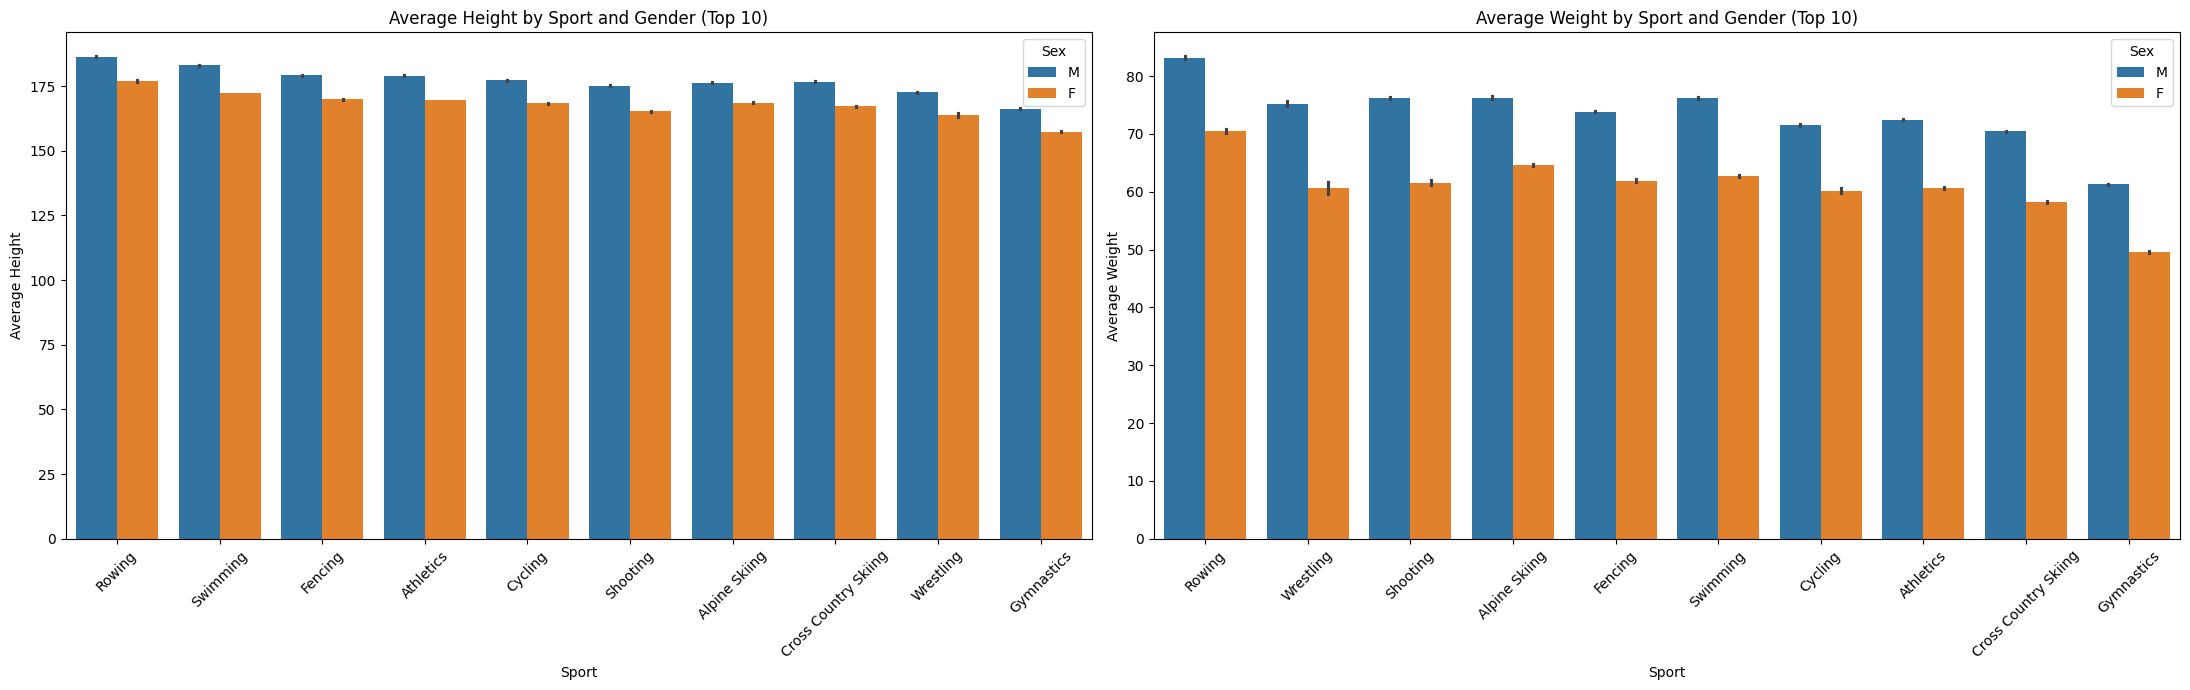

In [32]:
#Compute averages 
average_height = filtered_data.groupby('Sport')['Height'].mean().sort_values(ascending=False)
average_weight = filtered_data.groupby('Sport')['Weight'].mean().sort_values(ascending=False)

#Select top 10 sports 
top10_sports_height = average_height.head(10).index
top10_sports_weight = average_weight.head(10).index

#Create subplots
fig, axes = plt.subplots(1, 2, figsize=(22, 7))

#Plot Average Height 
sns.barplot(
    data=filtered_data[filtered_data['Sport'].isin(top10_sports_height)],
    x='Sport',
    y='Height',
    hue='Sex',
    estimator='mean',
    order=top10_sports_height,
    ax=axes[0]
)
axes[0].set_title("Average Height by Sport and Gender (Top 10)")
axes[0].set_xlabel("Sport")
axes[0].set_ylabel("Average Height")
axes[0].tick_params(axis='x', rotation=45)

#Plot Average Weight
sns.barplot(
    data=filtered_data[filtered_data['Sport'].isin(top10_sports_weight)],
    x='Sport',
    y='Weight',
    hue='Sex',
    estimator='mean',
    order=top10_sports_weight,
    ax=axes[1]
)
axes[1].set_title("Average Weight by Sport and Gender (Top 10)")
axes[1].set_xlabel("Sport")
axes[1].set_ylabel("Average Weight")
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


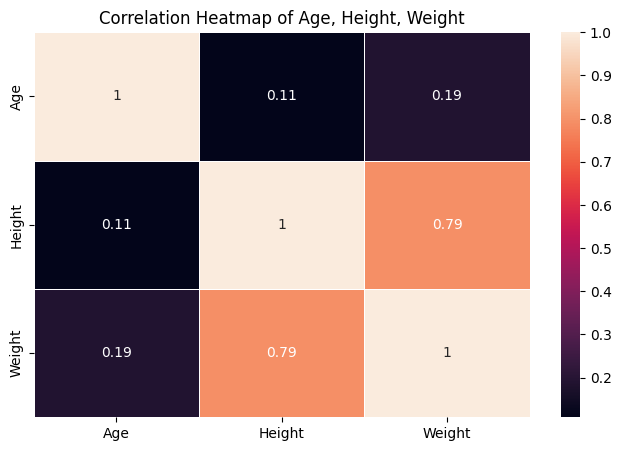

In [33]:
heatmap_col = data[['Age', 'Height', 'Weight']]
heatmap_col = heatmap_col.corr()

plt.figure(figsize=(8, 5))
sns.heatmap(heatmap_col, annot=True, linewidths=0.5)
plt.title("Correlation Heatmap of Age, Height, Weight")
plt.show()

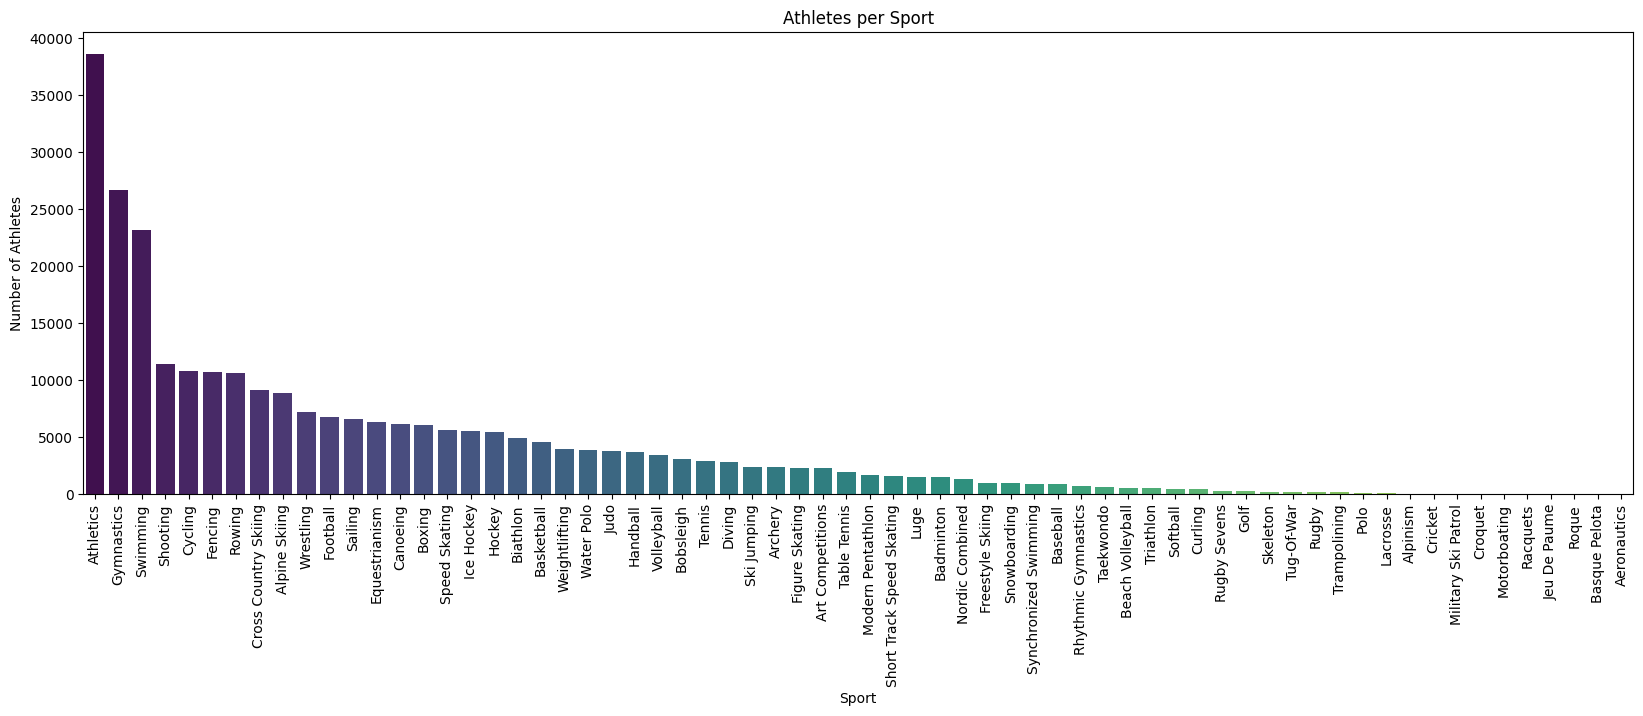

In [34]:
sport_count = data['Sport'].value_counts()
plt.figure(figsize=(20, 6))  # not plt.Figure, use plt.figure
sns.barplot(x=sport_count.index, y=sport_count.values, palette="viridis", hue=sport_count.index)
plt.title("Athletes per Sport")
plt.xlabel("Sport")
plt.ylabel("Number of Athletes")
plt.xticks(rotation=90)  
plt.show()

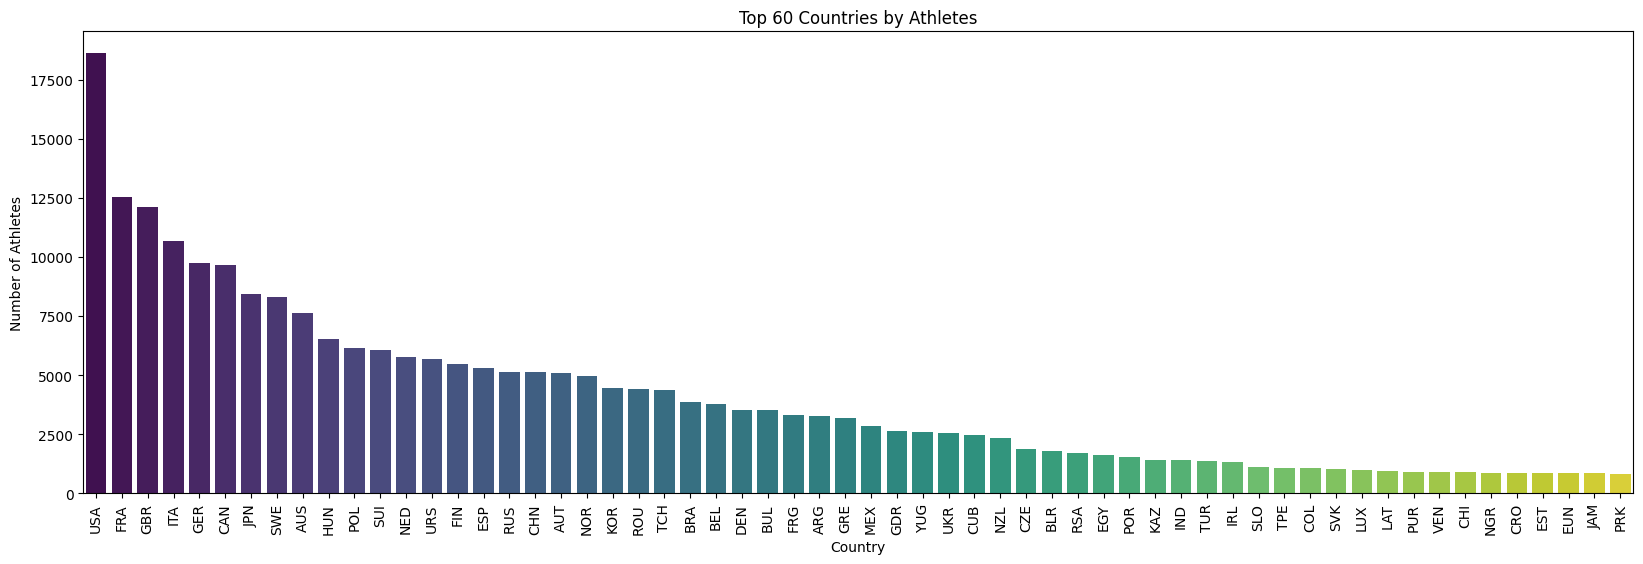

In [35]:
#Athletes per country
country_count = data['NOC'].value_counts().head(60)

plt.figure(figsize=(20, 6))
sns.barplot(x=country_count.index, y=country_count.values, palette="viridis", hue=country_count.index)
plt.title("Top 60 Countries by Athletes")
plt.xlabel("Country")
plt.ylabel("Number of Athletes")
plt.xticks(rotation=90) 
plt.show()

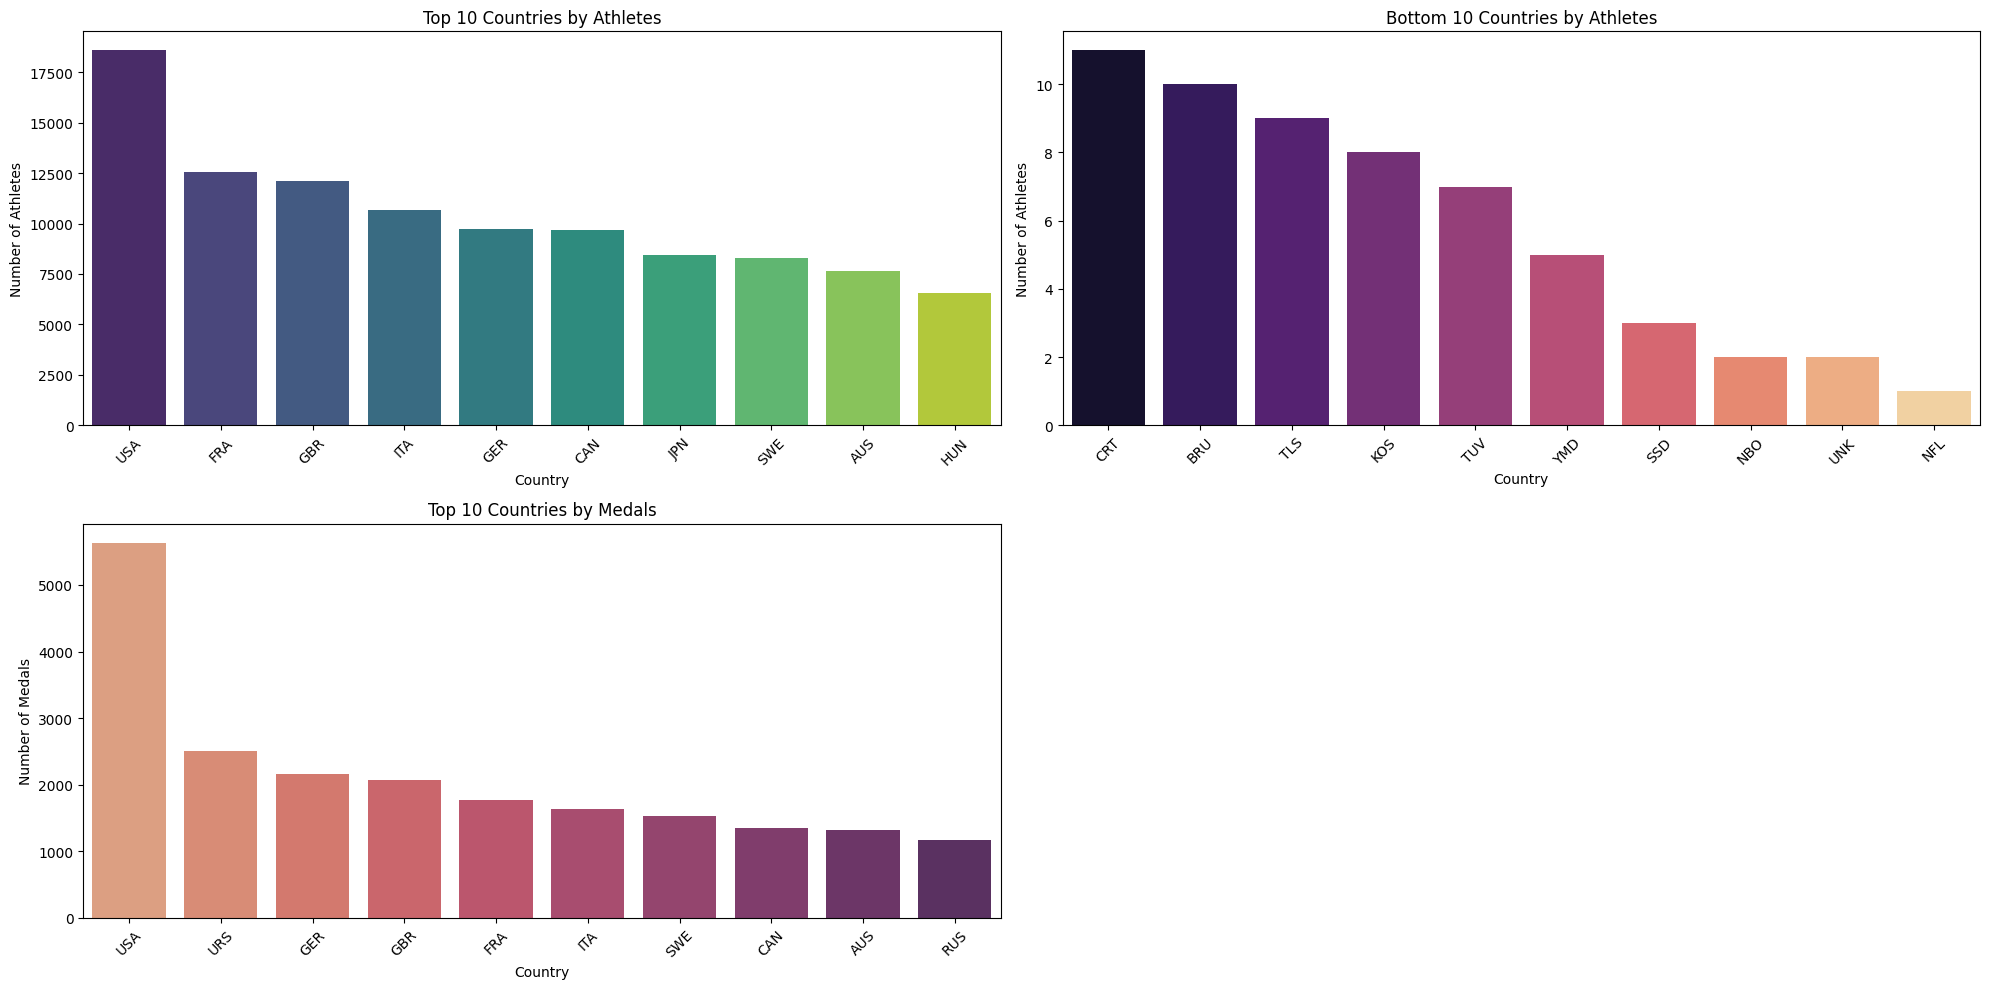

In [36]:
# Count athletes per country
country_count = data['NOC'].value_counts()

# Top 10 and bottom 10
top10 = country_count.head(10)
bottom10 = country_count.tail(10)

# Create subplots (2 rows, 2 columns)
fig, axes = plt.subplots(2, 2, figsize=(20, 10))

# ---------------- TOP 10 ----------------
sns.barplot(
    x=top10.index, 
    y=top10.values, 
    palette="viridis", 
    ax=axes[0][0],
    hue=top10.index,
    dodge=False
)
axes[0][0].set_title("Top 10 Countries by Athletes")
axes[0][0].set_xlabel("Country")
axes[0][0].set_ylabel("Number of Athletes")
axes[0][0].tick_params(axis='x', rotation=45)

# ---------------- BOTTOM 10 ----------------
sns.barplot(
    x=bottom10.index, 
    y=bottom10.values, 
    palette="magma", 
    ax=axes[0][1],
    hue=bottom10.index,
    dodge=False
)
axes[0][1].set_title("Bottom 10 Countries by Athletes")
axes[0][1].set_xlabel("Country")
axes[0][1].set_ylabel("Number of Athletes")
axes[0][1].tick_params(axis='x', rotation=45)

# ---------- TOP 10 COUNTRIES BY MEDALS ----------
# Exclude rows with "No medal"
medal_data = data[data["Medal"] != "No medal"]

# Count medals per country
medal_counts = medal_data["NOC"].value_counts().head(10)

# Plot
sns.barplot(
    x=medal_counts.index,
    y=medal_counts.values,
    palette="flare",
    hue= medal_counts.index,
    ax=axes[1][0]
)

axes[1][0].set_title("Top 10 Countries by Medals")
axes[1][0].set_xlabel("Country")
axes[1][0].set_ylabel("Number of Medals")
axes[1][0].tick_params(axis='x', rotation=45)

# Leave last subplot empty or use for something else
axes[1][1].axis("off")

plt.tight_layout()
plt.show()


In [37]:
medals = medal_data.groupby('Medal')["NOC"].value_counts().head(10)
print(medals)

Medal   NOC
Bronze  USA    1358
        GER     746
        URS     689
        FRA     666
        GBR     651
        SWE     535
        ITA     531
        AUS     517
        CAN     451
        FIN     432
Name: count, dtype: int64


Medal  Bronze  Gold  Silver
NOC                        
AUS       517   348     455
CAN       451   463     438
FRA       666   499     602
GBR       651   677     739
GER       746   745     674
ITA       531   575     531
RUS       408   390     367
SWE       535   479     522
URS       689  1082     732
USA      1358  2638    1641


C:\Users\Window\AppData\Local\Temp\ipykernel_1968\2022421186.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  top10_data = medal_data[medal_data['NOC'].isin(top10_countries) & (data['Medal'] != 'No medal')]


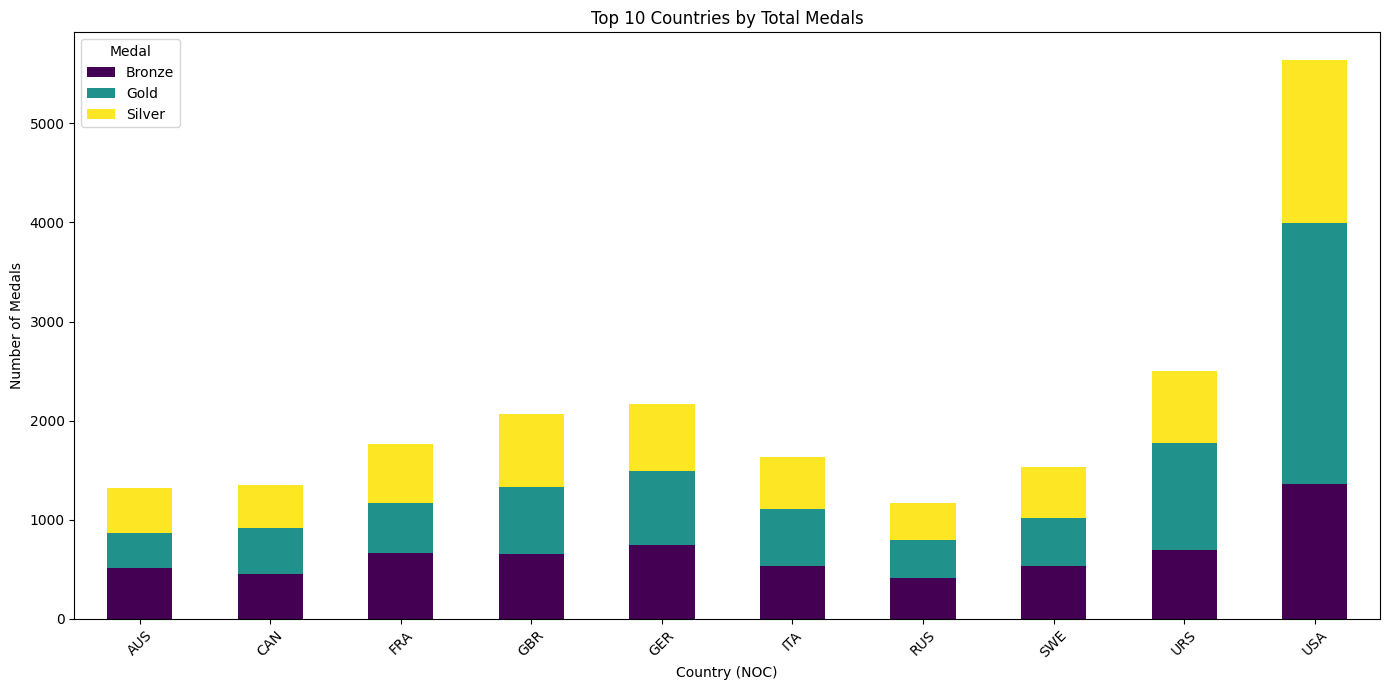

In [38]:
# --- 1. Compute total medals per country ---
country_total_medals = medal_data.groupby('NOC')['Medal'].count()

# --- 2. Select top 10 countries by total medals ---
top10_countries = country_total_medals.nlargest(10).index

# --- 3. Filter data for top 10 countries ---
top10_data = medal_data[medal_data['NOC'].isin(top10_countries) & (data['Medal'] != 'No medal')]

# --- 4. Pivot table: NOC as index, Medals as columns ---
pivot_df = top10_data.pivot_table(
    index='NOC',
    columns='Medal',
    aggfunc='size',
)

print(pivot_df)

# --- 5. Plot stacked bar chart ---
pivot_df.plot(kind='bar', stacked=True, figsize=(14,7), colormap='viridis')

plt.title("Top 10 Countries by Total Medals")
plt.xlabel("Country (NOC)")
plt.ylabel("Number of Medals")
plt.xticks(rotation=45)
plt.legend(title='Medal')
plt.tight_layout()
plt.show()



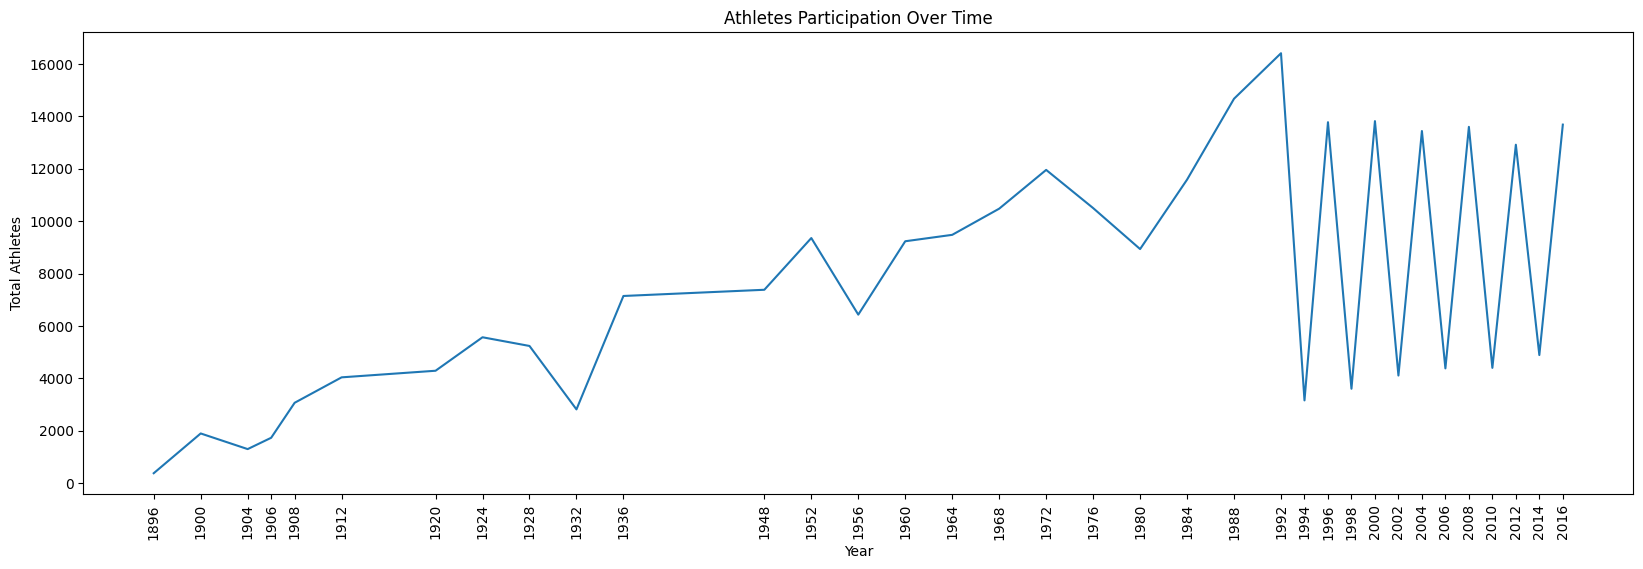

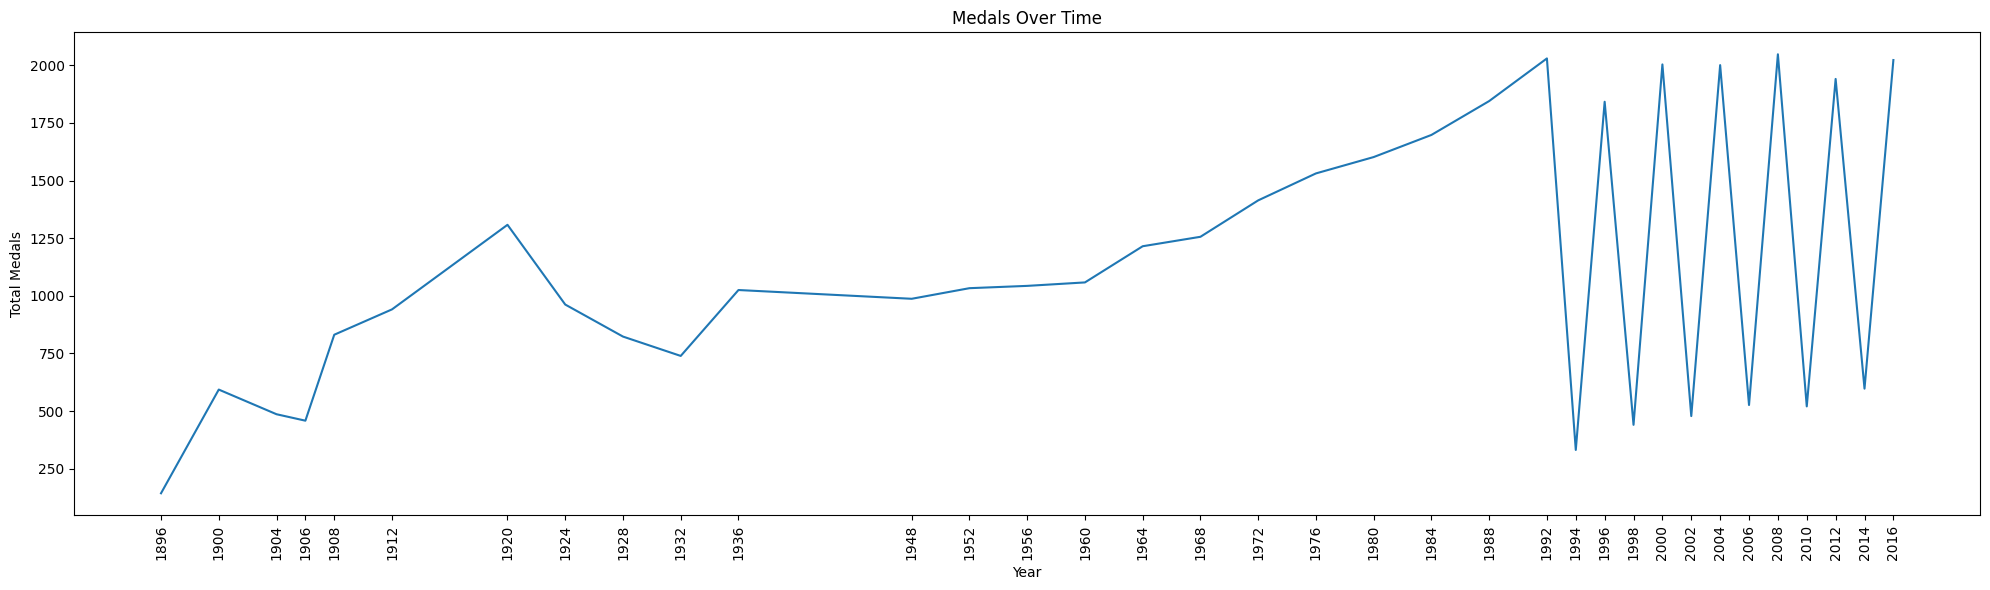

In [39]:
#Number of athletes per year
athletes_year_count = data['Year'].value_counts()

fig, ax =plt.subplots(figsize=(20, 6))

sns.lineplot(x=athletes_year_count.index, y=athletes_year_count.values, ax=ax)

ax.set_title("Athletes Participation Over Time")
ax.set_xlabel("Year")
ax.set_ylabel("Total Athletes")
ax.set_xticks(athletes_year_count.index)
ax.tick_params(axis='x', rotation=90)


#Total medals per year
medals_year = medal_data['Year'].value_counts()
#print(medals_year)
#print(medals_year.values.sum())
fig, ax =plt.subplots(figsize=(20, 6))

sns.lineplot(x=medals_year.index, y=medals_year.values, ax=ax)
ax.set_title("Medals Over Time")
ax.set_xlabel("Year")
ax.set_ylabel("Total Medals")
ax.tick_params(axis='x', rotation=90)
ax.set_xticks(medals_year.index)
plt.tight_layout()
plt.show()

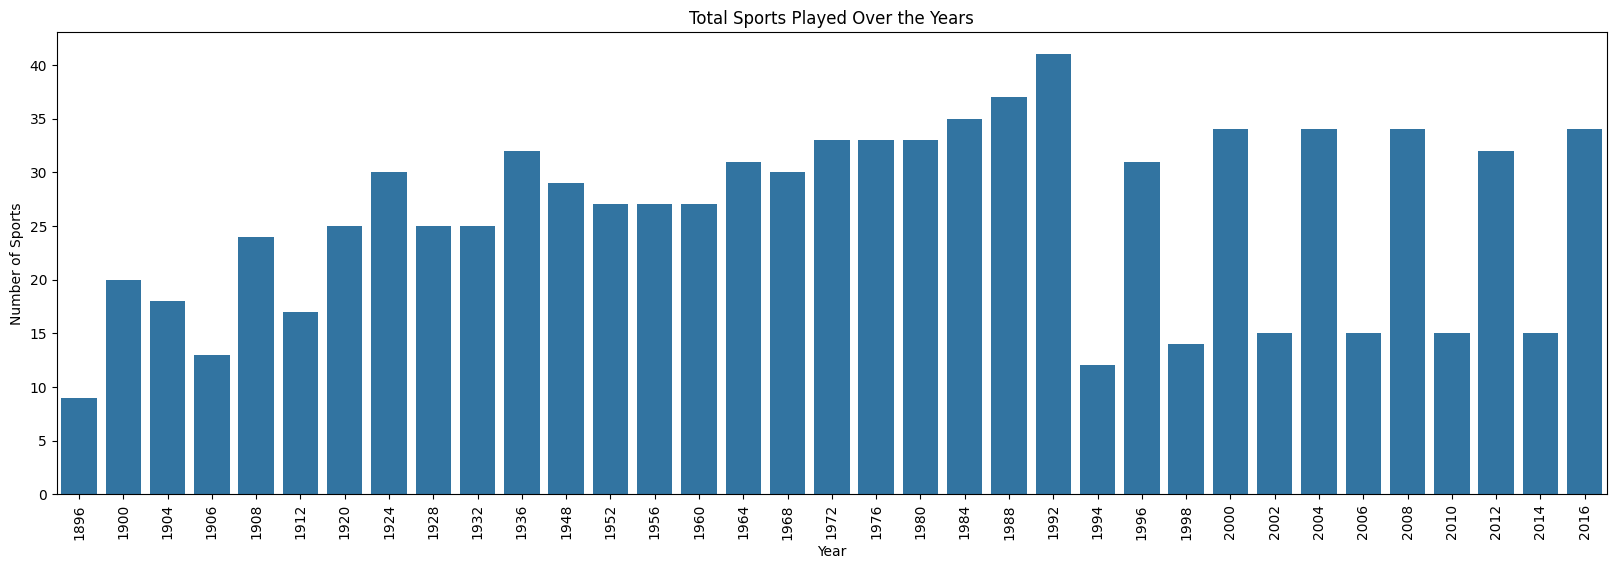

In [40]:
sport_count_year = data.groupby('Year')['Sport'].nunique()

fig, ax = plt.subplots(figsize=(20, 6))

sns.barplot(x=sport_count_year.index, y=sport_count_year.values, ax=ax )

ax.set_title('Total Sports Played Over the Years')
ax.set_ylabel('Number of Sports')
ax.set_xlabel('Year')

ax.tick_params(axis='x', rotation=90)

plt.show()

C:\Users\Window\AppData\Local\Temp\ipykernel_1968\2089926546.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=medal_sport_count.index, y=medal_sport_count.values, palette='magma', ax=axes[0])


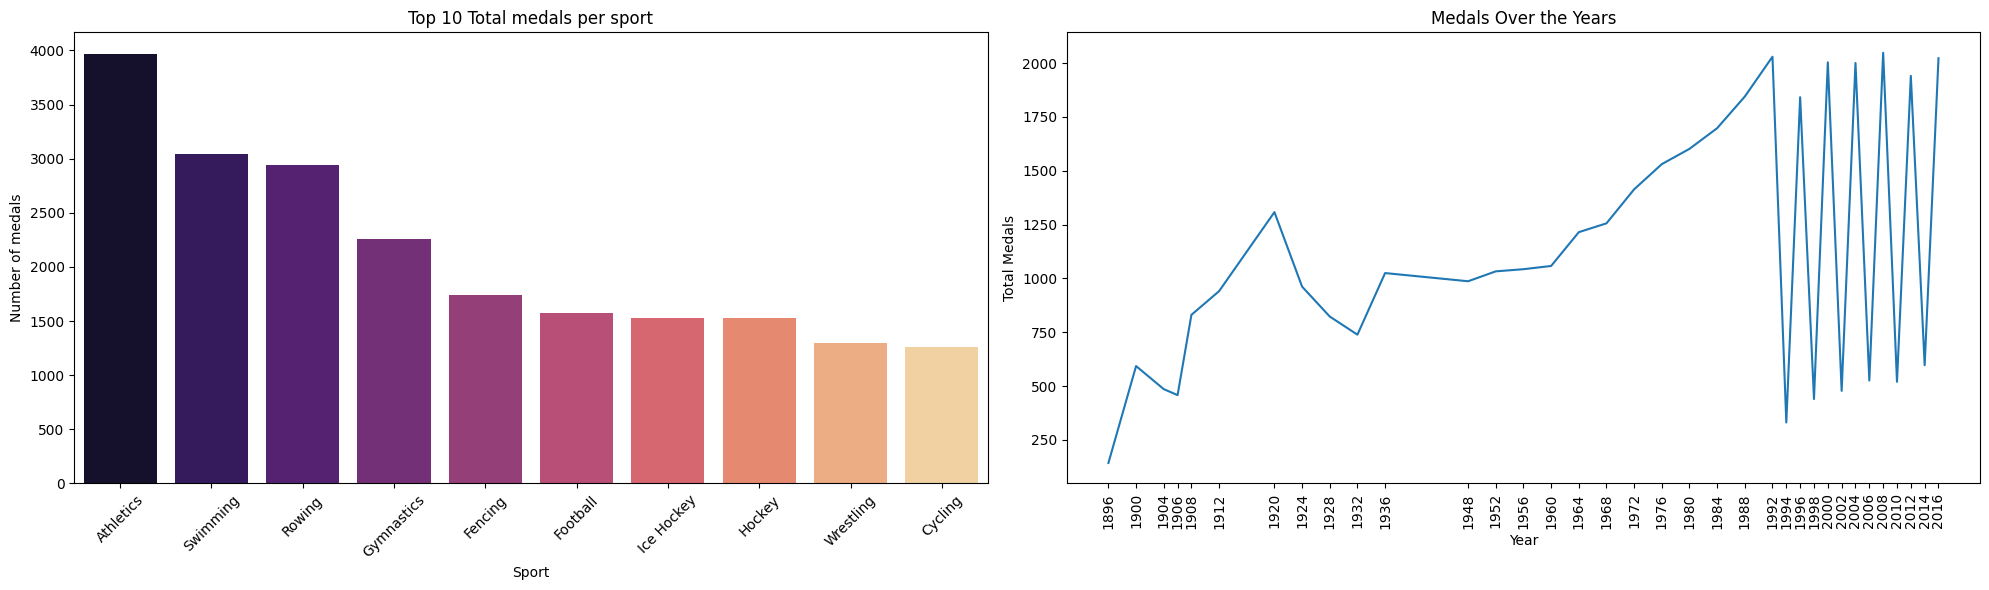

In [41]:
#Total medals per sport
medal_sport_count = medal_data["Sport"].value_counts().head(10)

fig, axes = plt.subplots(1, 2, figsize=(20, 6))
sns.barplot(x=medal_sport_count.index, y=medal_sport_count.values, palette='magma', ax=axes[0])
axes[0].set_title("Top 10 Total medals per sport")
axes[0].set_ylabel("Number of medals")
axes[0].set_xlabel("Sport")
axes[0].tick_params(axis='x', rotation=45)

#Total medals per year
medals_year = medal_data['Year'].value_counts()
#print(medals_year)
#print(medals_year.values.sum())

sns.lineplot(x=medals_year.index, y=medals_year.values, ax=axes[1])
axes[1].set_title("Medals Over the Years")
axes[1].set_xlabel("Year")
axes[1].set_ylabel("Total Medals")
axes[1].tick_params(axis='x', rotation=90)
axes[1].set_xticks(medals_year.index)

plt.tight_layout()
plt.show()

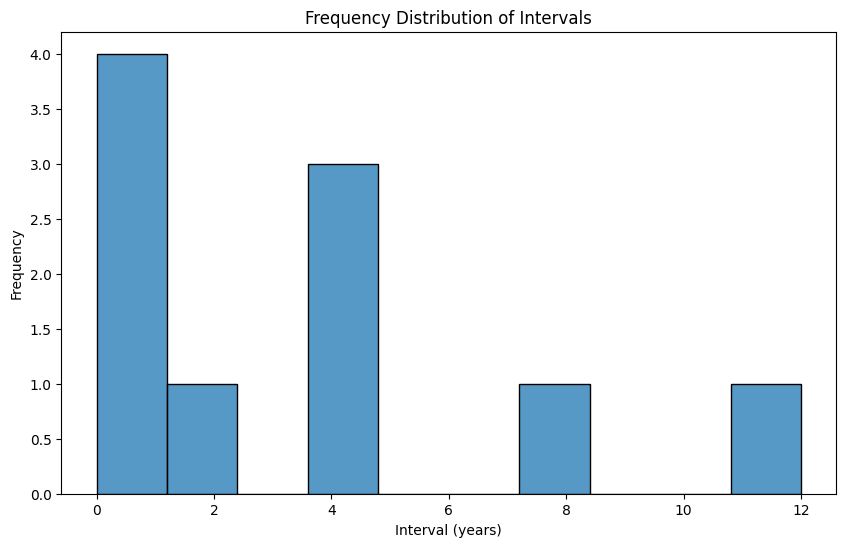

In [42]:
#Game year intervals per sport
data['Interval'] = data.groupby('Sport')['Year'].transform(lambda x: x.sort_values().diff().fillna(0))

game_interval = data.groupby('Sport')['Interval'].value_counts().head(10)
sport_name = game_interval.index.get_level_values(0)
sport_interval = game_interval.index.get_level_values(1)

data['Interval'] = data['Interval'].astype(int)

plt.figure(figsize=(10, 6))
sns.histplot(x=game_interval.index.get_level_values(1), bins=10, kde=False)
plt.title("Frequency Distribution of Intervals")
plt.xlabel("Interval (years)")
plt.ylabel("Frequency")
plt.show()